In [ ]:
# prompt: Import pandas, numpy, seaborn, matplotlib, and statsmodels

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [ ]:
# prompt: load the data from "/content/20. User_Data.csv"

import pandas as pd
data = pd.read_csv("/content/20. User_Data.csv")
print(data.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0


In [ ]:
data.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [ ]:
# prompt: check for null values

print(data.isnull().sum())


User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64


Interpretation: No null values present in the dataset

In [ ]:
# prompt: check for duplicates in rows

duplicate_rows = data[data.duplicated()]
print("Duplicate Rows :")
print(duplicate_rows)
print("Number of Duplicate Rows :", duplicate_rows.shape[0])


Duplicate Rows :
Empty DataFrame
Columns: [User ID, Gender, Age, EstimatedSalary, Purchased]
Index: []
Number of Duplicate Rows : 0


Interpretation: No duplicates present in the data

In [ ]:
# prompt: identify any outliers using iqr method

# Calculate Q1, Q3, and IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# Print the outliers
print("Outliers in 'Age' column:")
outliers


Outliers in 'Age' column:


,User ID,Gender,Age,EstimatedSalary,Purchased


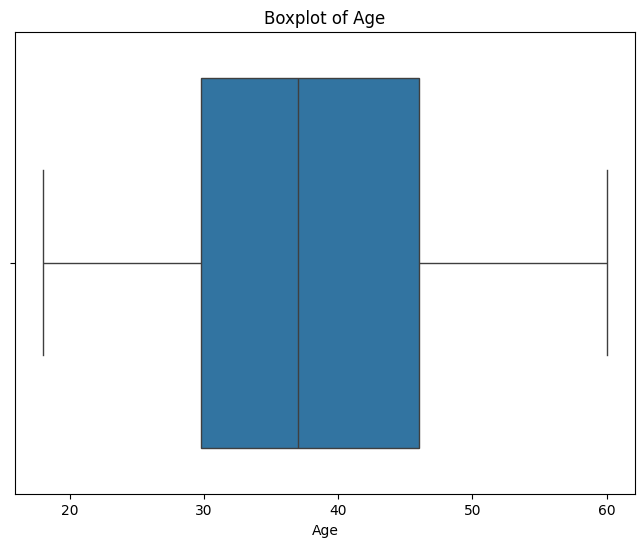

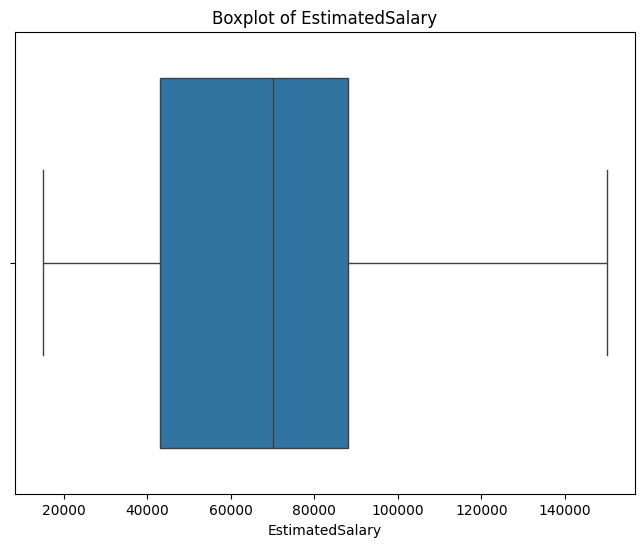

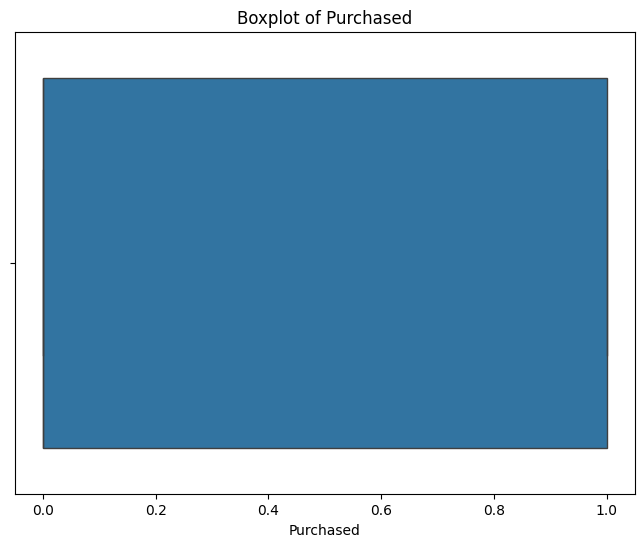

In [ ]:
# prompt: create boxplot for numeric columns and don't cosnider user id

import matplotlib.pyplot as plt
import numpy as np
# Create boxplots for numeric columns, excluding 'User ID'
numeric_cols = data.select_dtypes(include=np.number).columns
numeric_cols = numeric_cols.drop('User ID')

for col in numeric_cols:
    plt.figure(figsize=(8, 6))  # Adjust figure size as needed
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')
    plt.show()


Interpretation: There are no outliers present in the dataset

In [ ]:
# prompt: convert gender column to numerical data

# Convert gender column to numerical data
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
print(data.head())


    User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510       0   19            19000          0
1  15810944       0   35            20000          0
2  15668575       1   26            43000          0
3  15603246       1   27            57000          0
4  15804002       0   19            76000          0


Interpretation: Converted gender column into numerical values as it was categorical in nature

In [ ]:
data

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,0,19,19000,0
1,15810944,0,35,20000,0
2,15668575,1,26,43000,0
3,15603246,1,27,57000,0
4,15804002,0,19,76000,0
...,...,...,...,...,...
395,15691863,1,46,41000,1
396,15706071,0,51,23000,1
397,15654296,1,50,20000,1
398,15755018,0,36,33000,0


                  User ID    Gender       Age  EstimatedSalary  Purchased
User ID          1.000000  0.025249 -0.000721         0.071097   0.007120
Gender           0.025249  1.000000  0.073741         0.060435   0.042469
Age             -0.000721  0.073741  1.000000         0.155238   0.622454
EstimatedSalary  0.071097  0.060435  0.155238         1.000000   0.362083
Purchased        0.007120  0.042469  0.622454         0.362083   1.000000


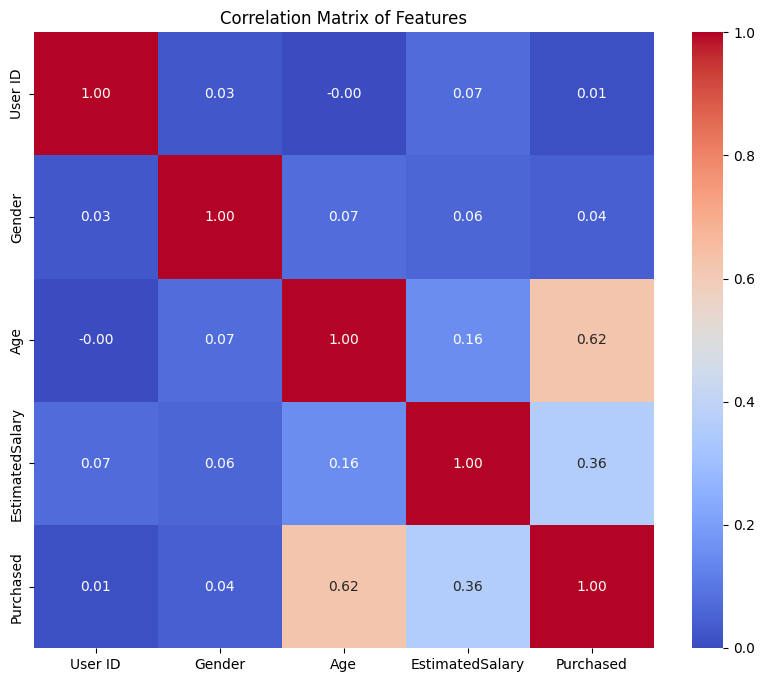

In [ ]:
# prompt: generate correlation matrix on dataset to check multicollinearity

import matplotlib.pyplot as plt
# Calculate the correlation matrix
correlation_matrix = data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()


Interpretation: Not much multicolinearity found in the dataset

In [ ]:
# prompt: perform feature scaling using standard scaler

from sklearn.preprocessing import StandardScaler

# Assuming 'data' is your DataFrame and you want to scale 'Age', 'EstimatedSalary', and 'Purchased'
# Select the features to scale
features_to_scale = ['Age', 'EstimatedSalary']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to your data and transform the selected features
data[features_to_scale] = scaler.fit_transform(data[features_to_scale])

# Print the scaled data
print(data.head())


    User ID  Gender       Age  EstimatedSalary  Purchased
0  15624510       0 -1.781797        -1.490046          0
1  15810944       0 -0.253587        -1.460681          0
2  15668575       1 -1.113206        -0.785290          0
3  15603246       1 -1.017692        -0.374182          0
4  15804002       0 -1.781797         0.183751          0


Interpretation: We then scaled the features using StandardScaler to standardize all variables to the same range (mean = 0, std = 1)

In [ ]:
# prompt: print X_train_scaled and y_train with column names

import pandas as pd
# Assuming 'data' is your DataFrame and you have already performed the scaling as shown in your code.
# Split the data into features (X) and target (y)
X = data[['Age', 'EstimatedSalary', 'Gender']]
y = data['Purchased']

# Now, let's assume you've split your data into training and testing sets. Replace these with your actual split.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Scale the features in X_train (if you haven't already)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Convert X_train_scaled back into a DataFrame to display column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=['Age', 'EstimatedSalary', 'Gender'])


# Concatenate X_train_scaled_df and y_train for combined display
combined_df = pd.concat([X_train_scaled_df, y_train.reset_index(drop=True)], axis=1)
combined_df


,Age,EstimatedSalary,Gender,Purchased
0,1.922950,2.146016,-1.025320,1
1,2.020161,0.378719,0.975305,0
2,-1.382215,-0.432499,0.975305,0
3,-1.187794,-1.011940,0.975305,0
4,1.922950,-0.925024,0.975305,1
...,...,...,...,...
315,0.950843,-1.156800,0.975305,1
316,-0.896162,-0.780164,-1.025320,0
317,-0.215686,-0.519415,-1.025320,0
318,-1.090583,-0.461471,0.975305,0


Interpretation: We have checked the dependent and independent variables

In [ ]:
# prompt: give the x train and y train column names

# Assuming 'data' is your DataFrame and you have already performed the scaling as shown in your code.
# Split the data into features (X) and target (y)
X = data[['Age', 'EstimatedSalary', 'Gender']]
y = data['Purchased']

# Now, let's assume you've split your data into training and testing sets. Replace these with your actual split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

print("X_train columns:", X_train.columns.tolist())
print("y_train column name:", y_train.name)


X_train columns: ['Age', 'EstimatedSalary', 'Gender']
y_train column name: Purchased


In [ ]:
# prompt: perform logistic regression using statsmodel

# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
log_reg = sm.Logit(y_train, X_train).fit()

# Print the model summary
print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.382735
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      316
Method:                           MLE   Df Model:                            3
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.4228
Time:                        17:35:17   Log-Likelihood:                -122.48
converged:                       True   LL-Null:                       -212.20
Covariance Type:            nonrobust   LLR p-value:                 1.155e-38
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.9471      0.231     -4.107      0.000      -1.399      -0.495
Age           

Interpretation:
After running the regression model we have found that gender variable has p-value > 0.05 (alpha)

In [ ]:
# prompt: drop the column with pvalue greater than 0.05

# Access p-values from the model summary
p_values = log_reg.pvalues

# Get the column names from the model summary (excluding the constant)
columns_in_summary = log_reg.params.index.tolist()[1:]

# Create a dictionary to store p-values and their respective columns
p_values_dict = dict(zip(columns_in_summary, p_values[1:]))

# Find the columns with p-values greater than 0.05
columns_to_drop = [key for key, value in p_values_dict.items() if value > 0.05]

# Drop the identified columns from the training and testing feature sets
X_train = X_train.drop(columns=columns_to_drop)
X_test = X_test.drop(columns=columns_to_drop)

print("Columns dropped:", columns_to_drop)

# Display the updated X_train
print(X_train.head())


Columns dropped: ['Gender']
     const       Age  EstimatedSalary
336    1.0  1.943215         2.180561
64     1.0  2.038728         0.389305
55     1.0 -1.304232        -0.432911
106    1.0 -1.113206        -1.020209
300    1.0  1.943215        -0.932114


In [ ]:
# prompt: perform logistic regression again

# Add a constant to the independent variables
X_train = sm.add_constant(X_train)

# Fit the logistic regression model
log_reg = sm.Logit(y_train, X_train).fit()

# Print the model summary
print(log_reg.summary())


Optimization terminated successfully.
         Current function value: 0.383289
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:              Purchased   No. Observations:                  320
Model:                          Logit   Df Residuals:                      317
Method:                           MLE   Df Model:                            2
Date:                Tue, 08 Apr 2025   Pseudo R-squ.:                  0.4220
Time:                        17:39:21   Log-Likelihood:                -122.65
converged:                       True   LL-Null:                       -212.20
Covariance Type:            nonrobust   LLR p-value:                 1.283e-39
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.0354      0.178     -5.808      0.000      -1.385      -0.686
Age           

In [ ]:
from sklearn.preprocessing import StandardScaler # Import StandardScaler
import pandas as pd


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

Performing Feature Scaling

In [ ]:
from sklearn.model_selection import train_test_split # Import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

Splitting the dataset into trained and tested data

In [ ]:
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

# Accuracy and Classification Report
from sklearn.metrics import accuracy_score, classification_report # Import accuracy_score and classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8125

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.92      0.86        51
           1       0.82      0.62      0.71        29

    accuracy                           0.81        80
   macro avg       0.81      0.77      0.78        80
weighted avg       0.81      0.81      0.81        80



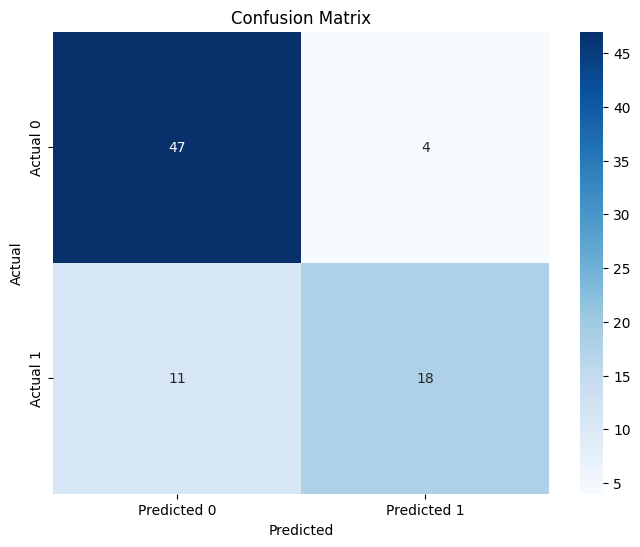

In [ ]:
# prompt: generate confusion matrix

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train, X_test, y_train, y_test are already defined from your previous code

# Initialize and train the logistic regression model
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Interpretation:
The logistic regression model predicted the Purchased status on the full dataset with the following results:

True Positives (Purchased correctly predicted): 18

True Negatives (Not Purchased correctly predicted): 47

False Positives (Not Purchased predicted as Parkinson's): 4

False Negatives (Purchased predicted as Not Purchased): 11

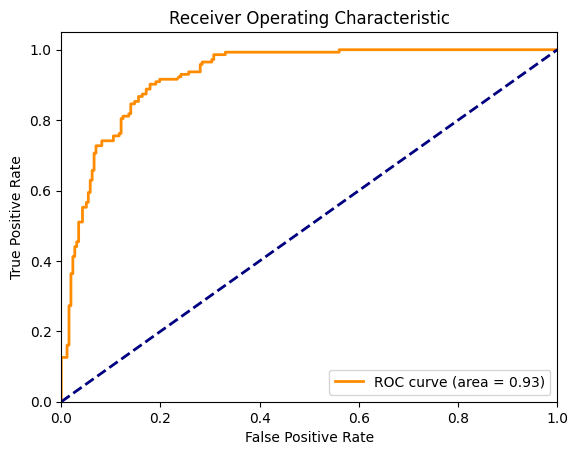

In [ ]:
# prompt: generate AUC curve on whole dataset

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming X, y are your complete dataset features and target variable
# If you've scaled X, use the scaled version here
# X_scaled = scaler.fit_transform(X)  # if you have used scaler

# Train the model on the entire dataset
classifier = LogisticRegression(random_state=0)
classifier.fit(X, y)

# Predict probabilities for the entire dataset
y_pred_proba = classifier.predict_proba(X)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


Interpretation: The model does a great job at classifying purchased individuals while minimizing false alarms. With an AUC of 0.93, it means there's a 93% chance the model can correctly distinguish a purchased individuals from a non purchased individual.

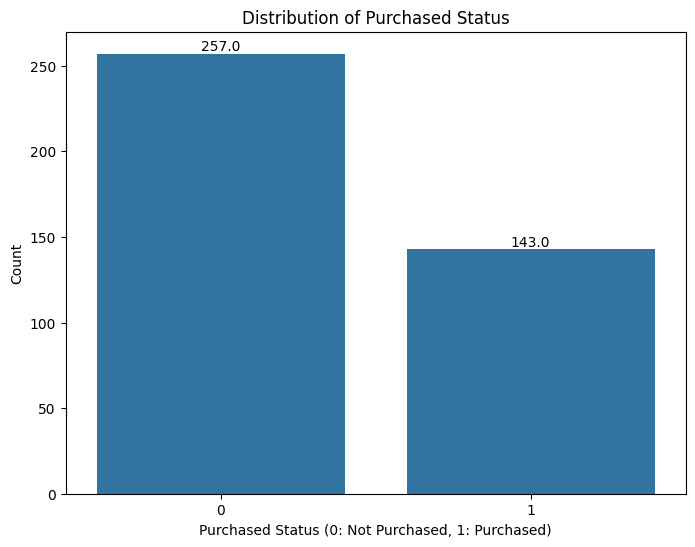

In [ ]:
# prompt: draw a bar graph for status variable on whole dataset also show values on the graph

import matplotlib.pyplot as plt
# Assuming 'data' is your DataFrame and 'Purchased' is the 'status' variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Purchased', data=data)
plt.title('Distribution of Purchased Status')
plt.xlabel('Purchased Status (0: Not Purchased, 1: Purchased)')
plt.ylabel('Count')

# Add value annotations to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                       ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                       textcoords='offset points')

plt.show()


Interpretation: The bar chart reveals a class imbalance the dataset contains 143 Purchased cases and 257 Not purchased cases. This imbalance skews the model’s learning toward the majority class (0), making it less effective at predicting the minority class (1).

In [1]:
# Summary of the analysis:

# 1. Data Loading and initial inspection:
#    - Loaded the dataset from "20. User_Data.csv" into a pandas DataFrame.
#    - Displayed the head of the DataFrame.
#    - Performed descriptive statistics and checked data types using .describe() and .info().

# 2. Data Cleaning:
#    - Checked for null values and confirmed none were present.
#    - Checked for duplicate rows and confirmed none were present.
#    - Identified and visualized potential outliers using the IQR method and boxplots for numeric columns (excluding 'User ID'). No outliers were found in 'Age', 'EstimatedSalary', and 'Purchased'.

# 3. Data Preprocessing:
#    - Converted the 'Gender' column from categorical (Male/Female) to numerical (0/1).
#    - Performed feature scaling on 'Age' and 'EstimatedSalary' using StandardScaler to standardize their ranges.

# 4. Model Building (Logistic Regression):
#    - Generated a correlation matrix to check for multicollinearity, which was found to be low.
#    - Split the data into features (X) and target (y), and then into training and testing sets.
#    - Performed logistic regression using `statsmodels.api`.
#    - Identified that the 'Gender' variable had a p-value greater than 0.05 and dropped it from the feature set.
#    - Performed logistic regression again with the reduced feature set ('Age' and 'EstimatedSalary').

# 5. Model Evaluation:
#    - Trained a Logistic Regression model using `sklearn`.
#    - Made predictions on the test set.
#    - Calculated and printed the accuracy score and classification report.
#    - Generated and displayed a confusion matrix to visualize the model's performance.
#    - Generated and displayed the AUC curve for the model on the whole dataset, indicating a good ability to distinguish between the two classes.

# 6. Class Imbalance Check:
#    - Visualized the distribution of the 'Purchased' variable using a bar graph, revealing a class imbalance.